In [1]:
% matplotlib inline

import pandas as pd, numpy as np
import seaborn as sns

df_r = pd.read_pickle('/home/raid3/oligschlager/workspace/tractdist/data/df_regionwise.pkl')
df_p = pd.read_pickle('/home/raid3/oligschlager/workspace/tractdist/data/df_pairwise.pkl')
gdist_mat = np.load('/nobackup/hunte1/sabine/data/tractdist/yerkes19_gdist_node-by-node.npy')

/home/raid3/oligschlager/anaconda2/envs/distconnect/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [64]:
sns.set_style('whitegrid')

In [40]:
test = [list() for _ in df_r.index]

df_r['buba'] = test

for i in df_r.index:
    src = df_r.area.iloc[i]
    df_r['buba'].iloc[i] = list(df_p['GDIST mean (mm)'][(df_p.source == src) &
                                                        (~df_p['GDIST mean (mm)'].isnull())])

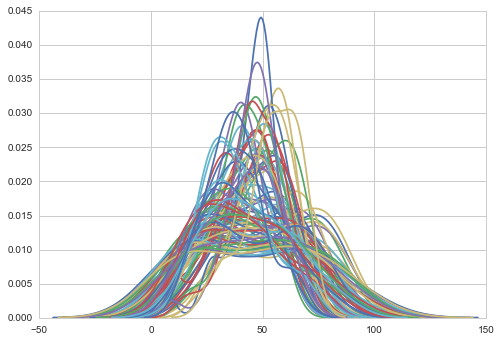

In [65]:
for i in df_r['buba']:
    sns.distplot(i, hist=False)

In [47]:
df_r['mean inj dist'] = np.nan

for i in df_r.index:
    df_r['mean inj dist'].iloc[i] = np.mean(df_r['buba'].iloc[i]) 

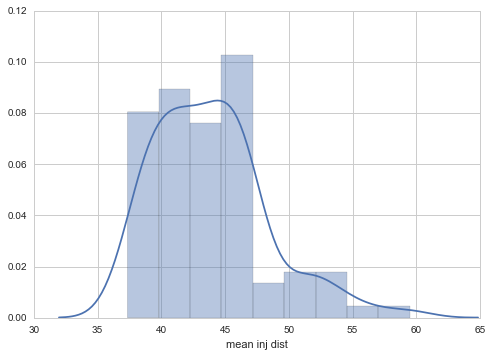

In [66]:
sns.distplot(df_r['mean inj dist'])

In [63]:
np.std(df_r['mean inj dist'])

4.4240493833531502

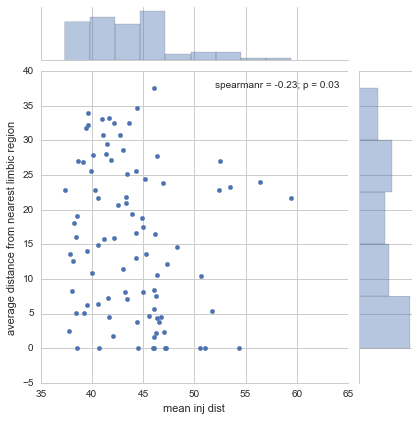

In [70]:
from scipy.stats import spearmanr

sns.jointplot(df_r['mean inj dist'],
              df_r['average distance from nearest limbic region'],
              stat_func=spearmanr)

In [71]:
for i in df_r.index:
    
    if df_r['mean inj dist'].iloc[i] > 50:
        print df_r.area.iloc[i]

V2
V3
V4
TEO
TEpv
TH/TF
V1
Ento
Pro.
Sub


In [72]:
import utils.viz as viz

ImportError: No module named utils.viz